In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow

In [11]:
df=pd.read_csv("../Datasets/Asthma.csv")
df.head()

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
2,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
4,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0


In [5]:
df.shape

(316800, 19)

In [6]:
df.columns

Index(['Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing', 'Sore-Throat',
       'None_Sympton', 'Pains', 'Nasal-Congestion', 'Runny-Nose',
       'None_Experiencing', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59',
       'Age_60+', 'Gender_Female', 'Gender_Male', 'Severity_Mild',
       'Severity_Moderate', 'Severity_None'],
      dtype='object')

In [12]:
import pandas as pd

# Assuming df is your DataFrame that contains one-hot encoded columns

# Reverting one-hot encoding for 'Age'
df['Age'] = df[['Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_60+']].idxmax(axis=1)
df['Age'] = df['Age'].str.replace('Age_', '')  # Removing the 'Age_' prefix to get the original values

# Reverting one-hot encoding for 'Severity'
df['Severity'] = df[['Severity_Mild', 'Severity_Moderate', 'Severity_None']].idxmax(axis=1)
df['Severity'] = df['Severity'].str.replace('Severity_', '')  # Removing 'Severity_' prefix

# Reverting one-hot encoding for 'Gender'
df['Gender'] = df[['Gender_Female', 'Gender_Male']].idxmax(axis=1)
df['Gender'] = df['Gender'].str.replace('Gender_', '')  # Removing 'Gender_' prefix

# If there are more columns like this, you can repeat the above steps for each set of one-hot encoded columns.

# Drop the one-hot encoded columns if not needed anymore
df.drop(columns=['Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_60+',
                 'Severity_Mild', 'Severity_Moderate', 'Severity_None',
                 'Gender_Female', 'Gender_Male'], inplace=True)

# Now, df has the original categorical columns
print(df.head())


   Tiredness  Dry-Cough  Difficulty-in-Breathing  Sore-Throat  None_Sympton  \
0          1          1                        1            1             0   
1          1          1                        1            1             0   
2          1          1                        1            1             0   
3          1          1                        1            1             0   
4          1          1                        1            1             0   

   Pains  Nasal-Congestion  Runny-Nose  None_Experiencing  Age  Severity  \
0      1                 1           1                  0  0-9      Mild   
1      1                 1           1                  0  0-9      Mild   
2      1                 1           1                  0  0-9      Mild   
3      1                 1           1                  0  0-9  Moderate   
4      1                 1           1                  0  0-9  Moderate   

  Gender  
0   Male  
1   Male  
2   Male  
3   Male  
4   Male  


In [13]:
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Gender' column (for encoding)
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Now, df has 'Gender' encoded as integers
print(df)

# To reverse the encoding, use the fitted encoder:
df['Gender'] = label_encoder.inverse_transform(df['Gender'])

# Now, df has 'Gender' reverted to the original values
print(df)


        Tiredness  Dry-Cough  Difficulty-in-Breathing  Sore-Throat  \
0               1          1                        1            1   
1               1          1                        1            1   
2               1          1                        1            1   
3               1          1                        1            1   
4               1          1                        1            1   
...           ...        ...                      ...          ...   
316795          0          0                        0            0   
316796          0          0                        0            0   
316797          0          0                        0            0   
316798          0          0                        0            0   
316799          0          0                        0            0   

        None_Sympton  Pains  Nasal-Congestion  Runny-Nose  None_Experiencing  \
0                  0      1                 1           1                  0   

In [14]:
df

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age,Severity,Gender
0,1,1,1,1,0,1,1,1,0,0-9,Mild,Male
1,1,1,1,1,0,1,1,1,0,0-9,Mild,Male
2,1,1,1,1,0,1,1,1,0,0-9,Mild,Male
3,1,1,1,1,0,1,1,1,0,0-9,Moderate,Male
4,1,1,1,1,0,1,1,1,0,0-9,Moderate,Male
...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,1,0,0,0,1,60+,Mild,Female
316796,0,0,0,0,1,0,0,0,1,60+,Mild,Female
316797,0,0,0,0,1,0,0,0,1,60+,None,Female
316798,0,0,0,0,1,0,0,0,1,60+,None,Female


In [15]:
df.sample(10)

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age,Severity,Gender
171055,0,0,0,0,1,0,0,0,0,10-19,Mild,Female
29707,1,1,1,0,0,1,1,1,0,60+,Mild,Female
281021,1,1,1,1,0,0,0,0,1,60+,Moderate,Female
122687,1,1,1,0,0,0,1,1,0,60+,None,Female
145135,0,1,0,0,0,0,1,1,0,20-24,Mild,Female
285124,1,1,1,1,0,1,1,1,0,0-9,Moderate,Male
20605,0,0,1,1,0,1,1,1,0,25-59,Mild,Male
83144,1,1,1,1,0,0,0,0,0,25-59,Mild,Male
123070,0,0,0,0,0,1,0,0,0,60+,None,Female
198746,1,1,1,0,0,0,0,1,0,10-19,Mild,Female


<Axes: >

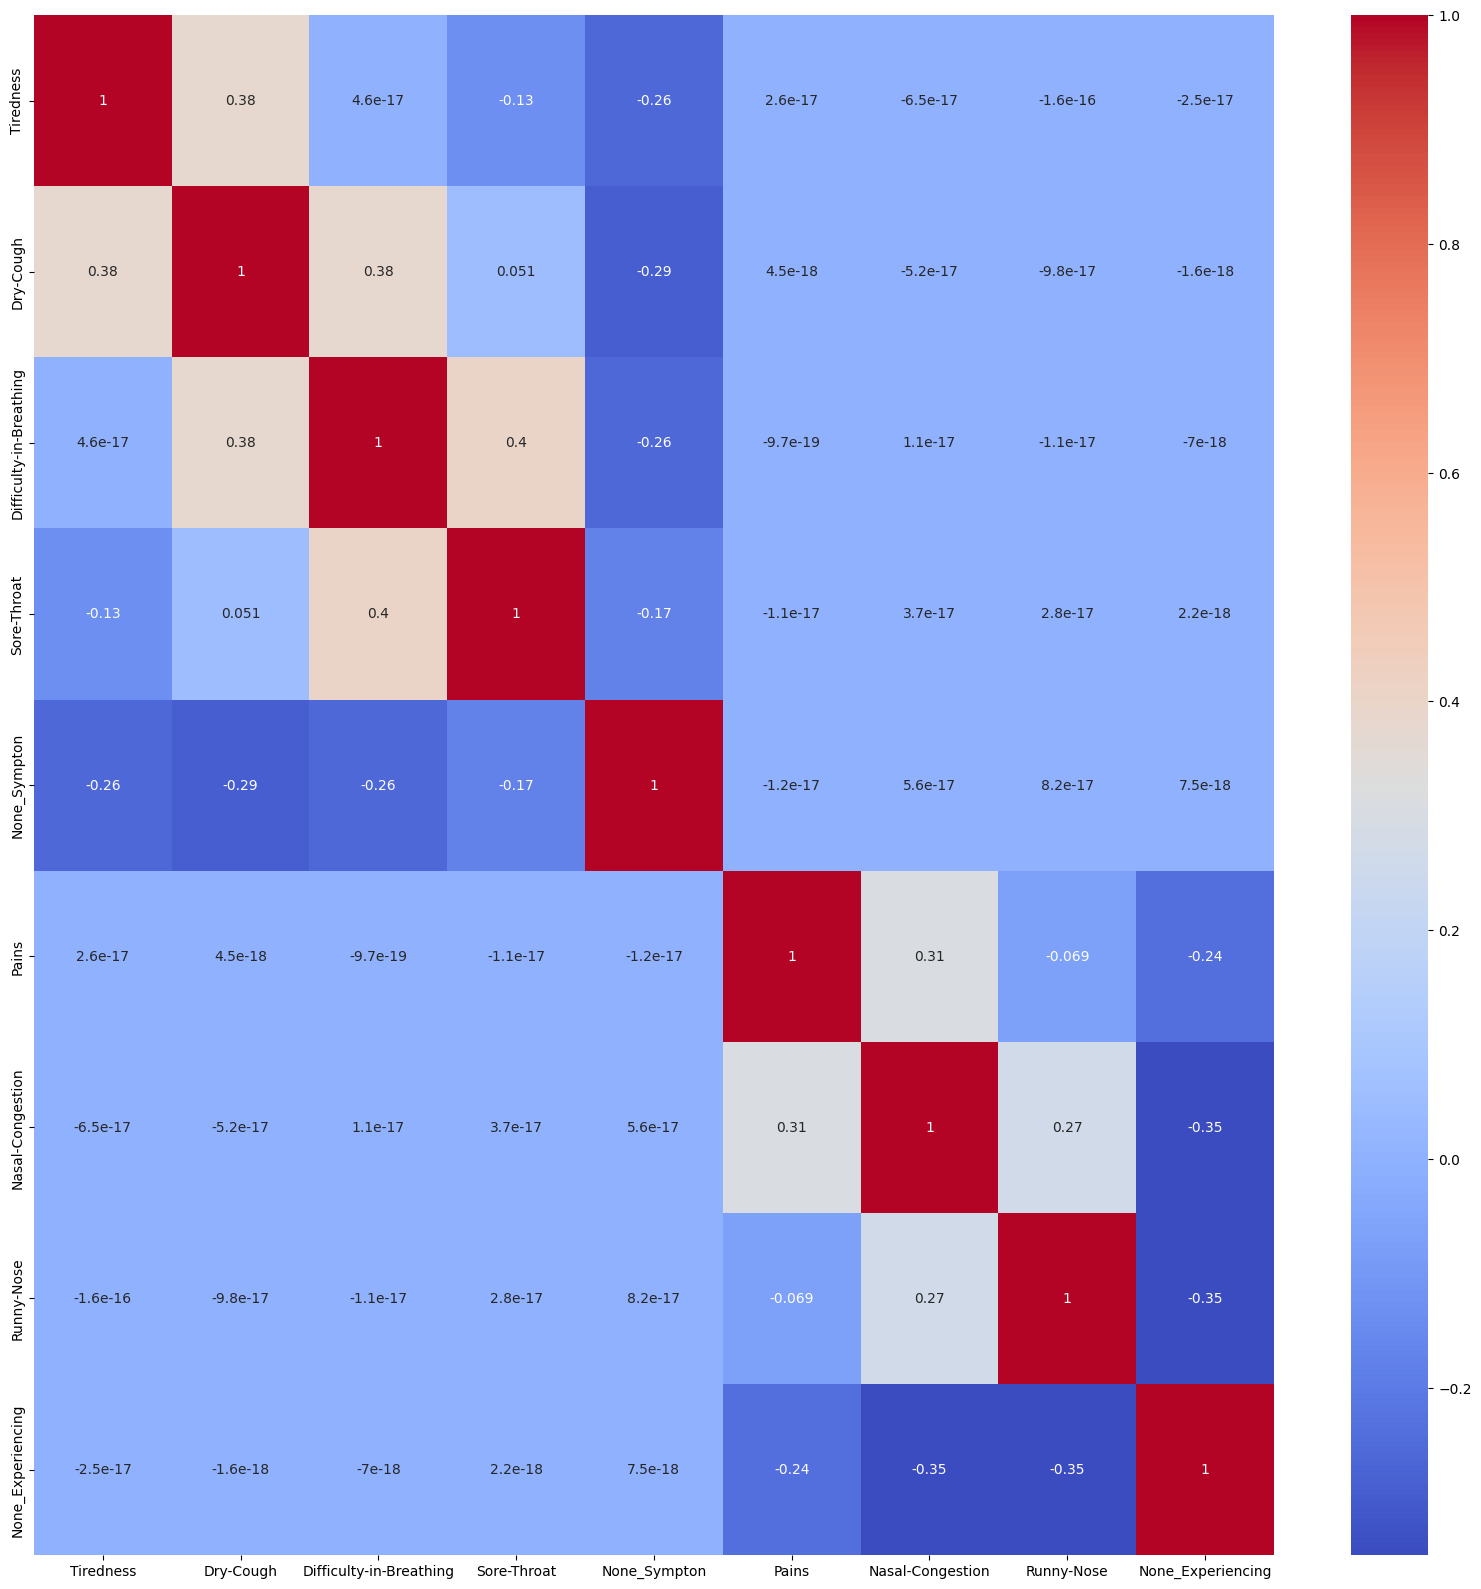

In [16]:
import seaborn as sns
corr = df.select_dtypes(include='number').corr()

plt.figure(figsize=(20,20))

sns.heatmap(corr, annot=True, cmap='coolwarm')